# Deep Learning
## Practice 1: Convolutional Neural Network

*   Alejandro Dopico Castro (alejandro.dopico2@udc.es).
*   Ana Xiangning Pereira Ezquerro (ana.ezquerro@udc.es).

## 1. Import Libraries

In [1]:
%load_ext nb_mypy

Version 1.0.5


In [1]:
import tensorflow as tf
from keras.optimizers import Adam
from logging import ERROR

tf.get_logger().setLevel(ERROR)
import warnings

warnings.filterwarnings("ignore")
from utils import *
from custom_models import SimpleModel, MidModel, CustomResNet
from typing import List, Tuple

2024-02-29 11:18:44.241821: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-29 11:18:44.374254: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 11:18:44.374304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 11:18:44.393068: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 11:18:44.433055: I tensorflow/core/platform/cpu_feature_guar

In [3]:
model_accuracies: List[Tuple[str, int]]= []

# 1.1 Link Google Drive

In [4]:
import sys

IN_COLAB = "google.colab" in sys.modules

if IN_COLAB:
    from google.colab import drive

    drive.mount("/content/gdrive", force_remount=True)

## 1.2 Define some global variables

In [5]:
IMG_SIZE = 64
BATCH_SIZE = 64

## 2. Load Data

In [6]:
base_dir = "/content/gdrive/MyDrive/animals_dataset" if IN_COLAB else "./animals"
model_dir = "/content/gdrive/MyDrive/models" if IN_COLAB else "./models"

import os

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

train_dataset, val_dataset, test_dataset = load_data(base_dir, IMG_SIZE, BATCH_SIZE)

Found 13474 files belonging to 5 classes.
Using 11453 files for training.
Using 2021 files for validation.


2024-02-23 17:49:45.085997: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-23 17:49:45.134149: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-23 17:49:45.134224: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-23 17:49:45.140418: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-23 17:49:45.140547: I external/local_xla/xla/stream_executor

Found 1497 files belonging to 5 classes.


## 3. Build Model

### 3.1. Simple Model

<cell>15: error: Argument "verbose" to "train_model" has incompatible type "int"; expected "str"  [arg-type]


Epoch 1/20


2024-02-23 17:49:50.917435: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-23 17:49:51.357866: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-23 17:49:51.999781: I external/local_xla/xla/service/service.cc:168] XLA service 0x5d6fd40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-23 17:49:51.999850: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-02-23 17:49:52.038250: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708706992.266075   17214 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 [==============================] - 17s 70ms/step - loss: 1.1226 - sparse_categorical_accuracy: 0.5899 - val_loss: 0.8652 - val_sparse_categorical_accuracy: 0.6769 - lr: 0.0010
Epoch 2/20
179/179 [==============================] - 10s 51ms/step - loss: 0.7768 - sparse_categorical_accuracy: 0.7105 - val_loss: 0.7562 - val_sparse_categorical_accuracy: 0.7125 - lr: 0.0010
Epoch 3/20
179/179 [==============================] - 10s 55ms/step - loss: 0.6466 - sparse_categorical_accuracy: 0.7627 - val_loss: 0.7197 - val_sparse_categorical_accuracy: 0.7303 - lr: 0.0010
Epoch 4/20
179/179 [==============================] - 10s 52ms/step - loss: 0.5679 - sparse_categorical_accuracy: 0.7928 - val_loss: 0.7198 - val_sparse_categorical_accuracy: 0.7333 - lr: 0.0010
Epoch 5/20
179/179 [==============================] - 11s 56ms/step - loss: 0.4887 - sparse_categorical_accuracy: 0.8197 - val_loss: 0.7756 - val_sparse_categorical_accuracy: 0.7209 - lr: 0.0010
Epoch 6/20
179/179 [================

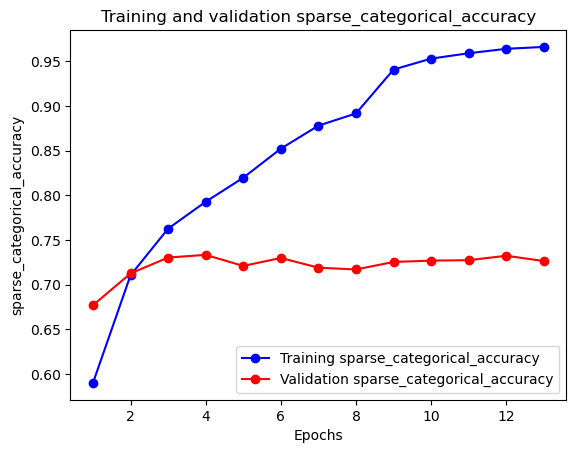

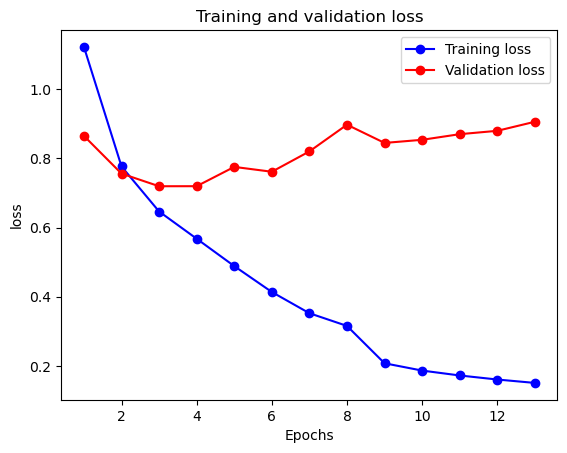

In [7]:
simple_model = SimpleModel(num_classes=5)
optimizer = Adam(learning_rate=1e-3)
simple_model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
simple_model_history = train_model(
    simple_model,
    train_dataset,
    val_dataset,
    n_epochs=20,
    model_dir=model_dir,
    batch_size=64,
    verbose=1,
)

print(
    f"Final loss: training -> {simple_model_history.history['loss'][-1]:.2f}, validation -> {simple_model_history.history['val_loss'][-1]:.2f}"
)
print(
    f"Final accuracy: training -> {simple_model_history.history['sparse_categorical_accuracy'][-1]:.2f}, validation -> {simple_model_history.history['val_sparse_categorical_accuracy'][-1]:.2f}"
)

plot(simple_model_history.history, metric="sparse_categorical_accuracy")
plot(simple_model_history.history, metric="loss")

In [8]:
test_loss, test_accuracy = simple_model.evaluate(test_dataset, batch_size=BATCH_SIZE)

print(
    f"Model evaluated: Test Loss-> {test_loss}, Test Accuracy -> {test_accuracy*100:.2f}%"
)
simple_model.summary()

model_accuracies.append(("SimpleModel", test_accuracy))

24/24 [==============================] - 1s 26ms/step - loss: 0.8342 - sparse_categorical_accuracy: 0.7348
Model evaluated: Test Loss-> 0.8341509103775024, Test Accuracy -> 73.48%
Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       multiple                  0         
                                                                 
 conv2d (Conv2D)             multiple                  896       
                                                                 
 max_pooling2d (MaxPooling2  multiple                  0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  multiple                  0 (unused)
 g2D) 

### 3.2 Mid Complex Model

Epoch 1/30


2024-02-23 17:52:13.778228: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmid_model/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


179/179 [==============================] - 19s 67ms/step - loss: 1.3390 - sparse_categorical_accuracy: 0.4147 - val_loss: 0.9863 - val_sparse_categorical_accuracy: 0.6116 - lr: 0.0010
Epoch 2/30
179/179 [==============================] - 10s 51ms/step - loss: 0.8406 - sparse_categorical_accuracy: 0.6709 - val_loss: 0.7192 - val_sparse_categorical_accuracy: 0.7229 - lr: 0.0010
Epoch 3/30
179/179 [==============================] - 10s 51ms/step - loss: 0.6558 - sparse_categorical_accuracy: 0.7412 - val_loss: 0.5853 - val_sparse_categorical_accuracy: 0.7704 - lr: 0.0010
Epoch 4/30
179/179 [==============================] - 10s 52ms/step - loss: 0.5328 - sparse_categorical_accuracy: 0.7906 - val_loss: 0.5107 - val_sparse_categorical_accuracy: 0.8041 - lr: 0.0010
Epoch 5/30
179/179 [==============================] - 10s 51ms/step - loss: 0.4521 - sparse_categorical_accuracy: 0.8210 - val_loss: 0.4800 - val_sparse_categorical_accuracy: 0.8125 - lr: 0.0010
Epoch 6/30
179/179 [================

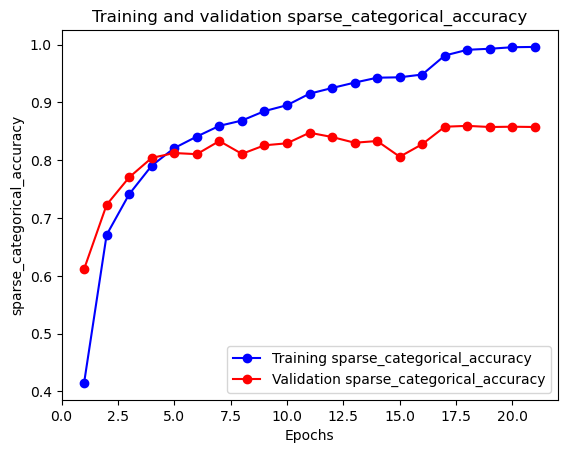

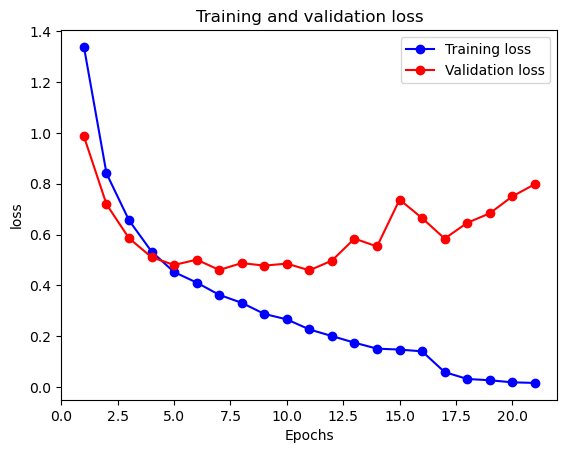

In [9]:
mid_model = MidModel(num_classes=5)
optimizer = Adam(learning_rate=1e-3)
mid_model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
mid_model_history = train_model(
    mid_model,
    train_dataset,
    val_dataset,
    n_epochs=30,
    batch_size=64,
    verbose=1,
    model_dir=model_dir,
    lr_patience=5,
    es_patience=10,
)
print(
    f"Final loss: training -> {mid_model_history.history['loss'][-1]:.2f}, validation -> {mid_model_history.history['val_loss'][-1]:.2f}"
)
print(
    f"Final accuracy: training -> {mid_model_history.history['sparse_categorical_accuracy'][-1]:.2f}, validation -> {mid_model_history.history['val_sparse_categorical_accuracy'][-1]:.2f}"
)

plot(mid_model_history.history, metric="sparse_categorical_accuracy")
plot(mid_model_history.history, metric="loss")

In [10]:
test_loss, test_accuracy = mid_model.evaluate(test_dataset, batch_size=BATCH_SIZE)

print(
    f"Model evaluated: Test Loss-> {test_loss}, Test Accuracy -> {test_accuracy*100:.2f}%"
)

model_accuracies.append(("MidModel", test_accuracy))
mid_model.summary()

24/24 [==============================] - 1s 37ms/step - loss: 0.8277 - sparse_categorical_accuracy: 0.8611
Model evaluated: Test Loss-> 0.8276590704917908, Test Accuracy -> 86.11%
Model: "mid_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     multiple                  0         
                                                                 
 conv2d_2 (Conv2D)           multiple                  896       
                                                                 
 conv2d_3 (Conv2D)           multiple                  9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  multiple                  0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           multiple                  0         
         

### 3.3 Model with residual connections

Epoch 1/50
179/179 [==============================] - 40s 143ms/step - loss: 1.2860 - sparse_categorical_accuracy: 0.4921 - val_loss: 2.7454 - val_sparse_categorical_accuracy: 0.2380 - lr: 0.0010
Epoch 2/50
179/179 [==============================] - 20s 106ms/step - loss: 0.6440 - sparse_categorical_accuracy: 0.7501 - val_loss: 0.8485 - val_sparse_categorical_accuracy: 0.6893 - lr: 0.0010
Epoch 3/50
179/179 [==============================] - 19s 102ms/step - loss: 0.4896 - sparse_categorical_accuracy: 0.8079 - val_loss: 0.6746 - val_sparse_categorical_accuracy: 0.7402 - lr: 0.0010
Epoch 4/50
179/179 [==============================] - 18s 99ms/step - loss: 0.3858 - sparse_categorical_accuracy: 0.8519 - val_loss: 0.5916 - val_sparse_categorical_accuracy: 0.7823 - lr: 0.0010
Epoch 5/50
179/179 [==============================] - 11s 55ms/step - loss: 0.3111 - sparse_categorical_accuracy: 0.8833 - val_loss: 1.7042 - val_sparse_categorical_accuracy: 0.5517 - lr: 0.0010
Epoch 6/50
179/179 [==

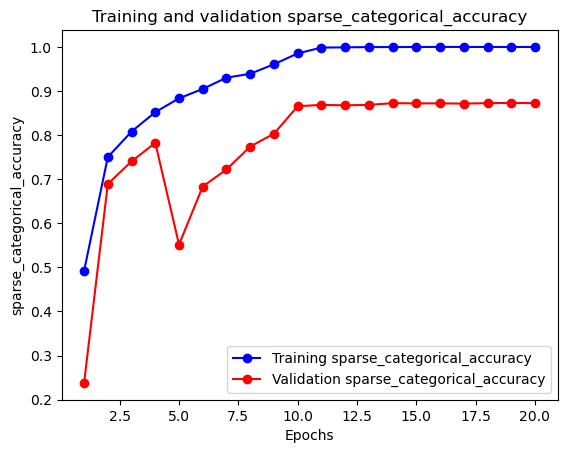

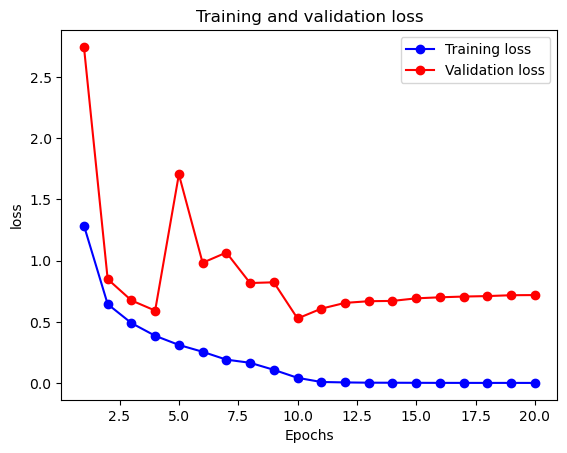

In [11]:
resnet = CustomResNet(num_classes=5)
optimizer = Adam(learning_rate=1e-3)
resnet.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
resnet_history = train_model(
    resnet,
    train_dataset,
    val_dataset,
    n_epochs=50,
    verbose=1,
    name="resnet",
    lr_patience=5,
    es_patience=10,
    model_dir=model_dir,
)

print(
    f"Final loss: training -> {resnet_history.history['loss'][-1]:.2f}, validation -> {resnet_history.history['val_loss'][-1]:.2f}"
)
print(
    f"Final accuracy: training -> {resnet_history.history['sparse_categorical_accuracy'][-1]:.2f}, validation -> {resnet_history.history['val_sparse_categorical_accuracy'][-1]:.2f}"
)

plot(resnet_history.history, metric="sparse_categorical_accuracy")
plot(resnet_history.history, metric="loss")

In [12]:
test_loss, test_accuracy = resnet.evaluate(test_dataset, batch_size=BATCH_SIZE)

print(
    f"Model evaluated: Test Loss-> {test_loss}, Test Accuracy -> {test_accuracy*100:.2f}%"
)

model_accuracies.append(("ResNet", test_accuracy))
resnet.summary()

24/24 [==============================] - 2s 72ms/step - loss: 0.6747 - sparse_categorical_accuracy: 0.8818
Model evaluated: Test Loss-> 0.6746934056282043, Test Accuracy -> 88.18%
Model: "custom_res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     multiple                  0         
                                                                 
 zero_padding2d (ZeroPaddin  multiple                  0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           multiple                  9472      
                                                                 
 batch_normalization (Batch  multiple                  256       
 Normalization)                                                  
                                                                 
 max

### 3.4 What if we add Data Augmentation?

Epoch 1/50
179/179 [==============================] - 32s 118ms/step - loss: 1.3888 - sparse_categorical_accuracy: 0.4436 - val_loss: 2.0641 - val_sparse_categorical_accuracy: 0.3513 - lr: 0.0010
Epoch 2/50
179/179 [==============================] - 22s 119ms/step - loss: 0.8724 - sparse_categorical_accuracy: 0.6576 - val_loss: 1.4704 - val_sparse_categorical_accuracy: 0.5042 - lr: 0.0010
Epoch 3/50
179/179 [==============================] - 21s 111ms/step - loss: 0.6989 - sparse_categorical_accuracy: 0.7282 - val_loss: 0.6574 - val_sparse_categorical_accuracy: 0.7551 - lr: 0.0010
Epoch 4/50
179/179 [==============================] - 12s 60ms/step - loss: 0.6128 - sparse_categorical_accuracy: 0.7627 - val_loss: 0.8787 - val_sparse_categorical_accuracy: 0.6912 - lr: 0.0010
Epoch 5/50
179/179 [==============================] - 11s 57ms/step - loss: 0.5560 - sparse_categorical_accuracy: 0.7860 - val_loss: 0.7778 - val_sparse_categorical_accuracy: 0.7071 - lr: 0.0010
Epoch 6/50
179/179 [==

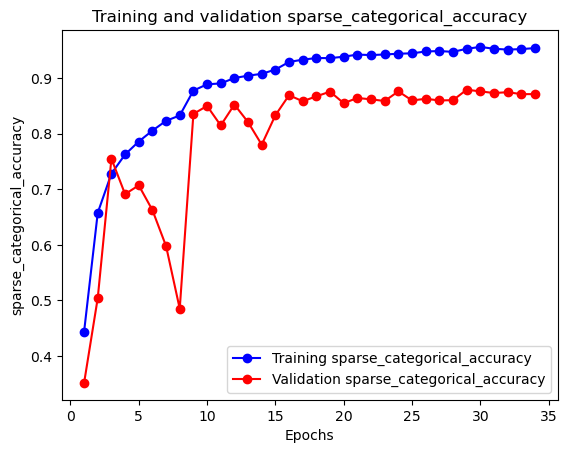

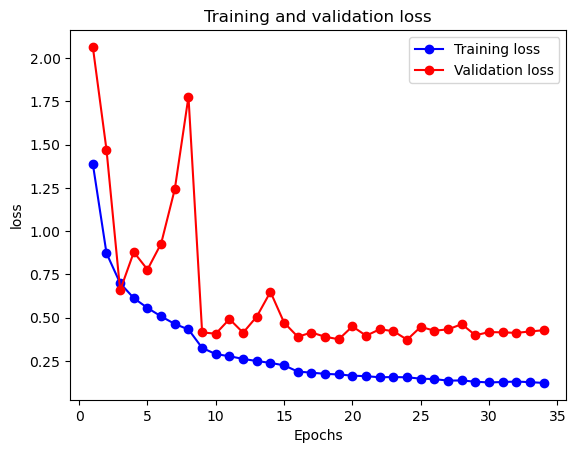

In [13]:
from keras import Sequential

resnet = CustomResNet(num_classes=5)

resnet_data_aug = Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        resnet,
    ]
)

resnet_data_aug.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

resnet_data_aug_history = train_model(
    resnet_data_aug,
    train_dataset,
    val_dataset,
    n_epochs=50,
    verbose=1,
    name="resnet_data_augmentation",
    lr_patience=5,
    es_patience=10,
    model_dir=model_dir,
)

print(
    f"Final loss: training -> {resnet_data_aug_history.history['loss'][-1]:.2f}, validation -> {resnet_data_aug_history.history['val_loss'][-1]:.2f}"
)
print(
    f"Final accuracy: training -> {resnet_data_aug_history.history['sparse_categorical_accuracy'][-1]:.2f}, validation -> {resnet_data_aug_history.history['val_sparse_categorical_accuracy'][-1]:.2f}"
)

plot(resnet_data_aug_history.history, metric="sparse_categorical_accuracy")
plot(resnet_data_aug_history.history, metric="loss")

In [14]:
test_loss, test_accuracy = resnet_data_aug.evaluate(test_dataset, batch_size=BATCH_SIZE)

print(
    f"Model evaluated: Test Loss-> {test_loss}, Test Accuracy -> {test_accuracy*100:.2f}%"
)

model_accuracies.append(("ResNetDataAugmentation", test_accuracy))
resnet_data_aug.summary()

24/24 [==============================] - 1s 23ms/step - loss: 0.3875 - sparse_categorical_accuracy: 0.8811
Model evaluated: Test Loss-> 0.3875102400779724, Test Accuracy -> 88.11%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 64, 64, 3)         0         
                                                                 
 random_rotation (RandomRot  (None, 64, 64, 3)         0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 64, 64, 3)         0         
                                                                 
 custom_res_net_1 (CustomRe  (None, 5)                 11705333  
 sNet)                                                           
                                                                 
Total pa

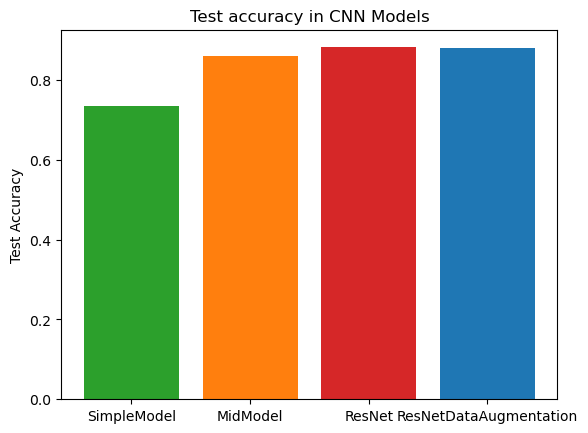

In [15]:
fig, ax = plt.subplots()

models = [name for name, _ in model_accuracies]
accuracies = [accuracy for _, accuracy in model_accuracies]
bar_colors = ["tab:green", "tab:orange", "tab:red", "tab:blue"]
ax.bar(models, accuracies, label=models, color=bar_colors)

ax.set_ylabel("Test Accuracy")
ax.set_title("Test accuracy in CNN Models")

plt.show()